In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('Baza_PhysNew.xlsx')

In [16]:
for col in data.columns[:]:
    # print in the same size columns
    quoted = f'"{col}"'
    print(f'{quoted:40}', data[col].dtype)

"Numbering"                              int64
"Study groups"                           object
"StudentID"                              int64
"Group"                                  int64
"1անատ"                                  int64
"2անատ"                                  int64
"2Հյուսվ"                                int64
"2Կենսաբ"                                int64
"Sum of  1 Year"                         object
"3 Կենսաքիմիա"                           int64
"3 Հյուսվածքաբանություն"                 int64
"3 Անատոմիա"                             int64
"3 Ֆիզիոլոգիա"                           int64
"4 Կենսաքիմիա"                           int64
"4 Մանրէաբանություն"                     int64
"4 ֆիզիոլոգիա"                           int64
"Sum of 2 year"                          int64
"5 Մանրէաբանություն"                     int64
"5Ախտաբանական անատոմիա"                  int64
"5 Ֆարմակոլոգիա"                         int64
"5Ախտաֆիզ"                               int64
"5 Օպերատիվ

In [5]:
# show all columns pandas
pd.set_option('display.max_columns', None)
data

,Numbering,Study groups,StudentID,Group,1անատ,2անատ,2Հյուսվ,2Կենսաբ,Sum of 1 Year,3 Կենսաքիմիա,3 Հյուսվածքաբանություն,3 Անատոմիա,3 Ֆիզիոլոգիա,4 Կենսաքիմիա,4 Մանրէաբանություն,4 ֆիզիոլոգիա,Sum of 2 year,5 Մանրէաբանություն,5Ախտաբանական անատոմիա,5 Ֆարմակոլոգիա,5Ախտաֆիզ,5 Օպերատիվ վիրաբուժություն,5Ներքին հիվանդությունների պրոպեդևտիկա,5 Ընդհանուր վիրաբուժություն,6Ներքին հիվանդությունների պրոպեդևտիկա,6Ախտաբանական անատոմիա,6 Ֆարմակոլոգիա,6Ախտաբանական ֆիզոլոգիա,6 Ընդհանուր վիրաբուժություն,sum
0,1,Motivated,21892,203,9,9,10,10,38,8,10,9,10,9,10,9,65,6,8,8,7,7,9,10,10,7,8,8,10,98
1,2,Motivated,21894,203,10,10,9,6,35,8,10,10,10,8,8,10,64,6,8,8,7,8,9,8,10,6,8,7,10,95
2,3,Motivated,21889,203,8,8,8,9,33,6,9,8,7,8,8,8,54,5,7,6,7,6,9,8,9,7,7,7,8,86
3,4,Motivated,21897,203,7,8,8,9,32,7,9,9,8,6,6,7,52,7,6,7,6,5,8,8,8,6,6,7,7,81
4,5,Motivated,21929,205,10,9,9,7,35,8,10,10,10,10,10,10,68,9,9,10,8,8,10,10,10,9,10,9,10,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,288,Control,22326,235,7,7,7,8,29,5,8,6,6,5,7,5,42,5,5,8,5,7,6,6,8,6,8,7,8,79
412,289,Control,22356,235,6,7,7,7,27,6,5,5,5,5,6,5,37,5,5,6,6,5,6,7,6,7,6,5,8,72
413,290,Control,22347,235,5,9,5,6,25,5,5,5,6,6,5,6,38,6,6,5,5,6,7,7,8,6,5,6,6,73
414,291,Control,22349,235,7,7,5,7,26,6,5,5,6,6,5,5,38,5,5,5,5,5,5,6,6,5,5,6,6,64


In [8]:
data['Study groups'].unique()

array(['Motivated', 'Participants', 'Control'], dtype=object)

In [9]:
study_groups = {
    'Motivated': data[data['Study groups'] == 'Motivated'],
    'Control': data[data['Study groups'] == 'Control'],
    'Participants': data[data['Study groups'] == 'Participants']
}

In [11]:
motivated = study_groups['Motivated']
control = study_groups['Control']
participants = study_groups['Participants']

In [17]:
columns_for_corr = [

'3 Կենսաքիմիա',
'3 Հյուսվածքաբանություն',
'3 Անատոմիա',
'3 Ֆիզիոլոգիա',

'4 Կենսաքիմիա',
'4 Մանրէաբանություն',
'4 ֆիզիոլոգիա',

'Sum of 2 year',
'5 Մանրէաբանություն',
'5Ախտաբանական անատոմիա',
'5 Ֆարմակոլոգիա',
'5Ախտաֆիզ',
'5 Օպերատիվ վիրաբուժություն',
'5Ներքին հիվանդությունների պրոպեդևտիկա',
'5 Ընդհանուր վիրաբուժություն ',
'6Ներքին հիվանդությունների պրոպեդևտիկա',
'6Ախտաբանական անատոմիա',
'6 Ֆարմակոլոգիա',
'6Ախտաբանական ֆիզոլոգիա',
'6 Ընդհանուր վիրաբուժություն ',
]


In [33]:
def get_phys_and_mean(d):
    phys = (d['3 Ֆիզիոլոգիա'] + d['4 ֆիզիոլոգիա']) / 2
    other_mean = (d['3 Կենսաքիմիա'] + d['3 Հյուսվածքաբանություն'] + d['3 Անատոմիա'] + d['3 Ֆիզիոլոգիա'] + d['4 Կենսաքիմիա'] + d['4 Մանրէաբանություն'] + d['4 ֆիզիոլոգիա']) / 7
    return phys, other_mean


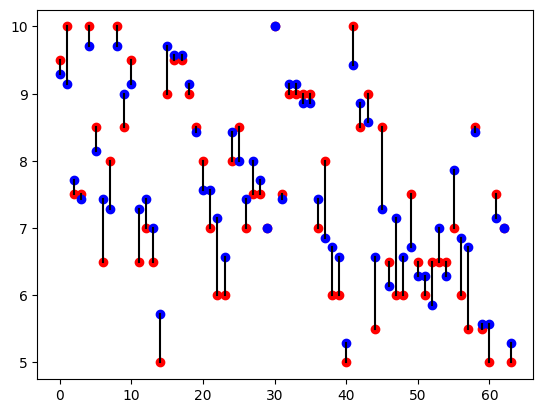

In [38]:
# scatter both phys and mean on one graph with different colors
import matplotlib.pyplot as plt
import numpy as np

motivated_phys, motivated_mean = get_phys_and_mean(motivated)

plt.scatter(np.arange(len(motivated_phys)), motivated_phys, color='red')
plt.scatter(np.arange(len(motivated_mean)), motivated_mean, color='blue')

# connect the dots on the same column with lines
for i, mp, mm in enumerate(zip(motivated_phys, motivated_mean)):
    plt.plot([i, i], [mp, mm], color='black')

plt.show()


60 60


KeyError: 0

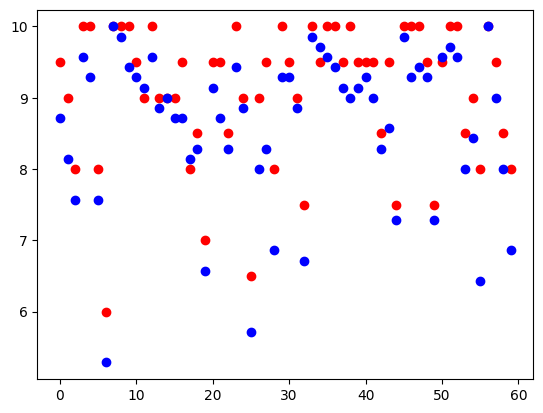

In [45]:
# clear the plot
plt.clf()

participants_phys, participants_mean = get_phys_and_mean(participants)

assert len(participants_phys) == len(participants_mean)

plt.scatter(np.arange(len(participants_phys)), participants_phys, color='red')
plt.scatter(np.arange(len(participants_mean)), participants_mean, color='blue')

# connect the dots on the same column with lines
for i in range(len(participants_phys)):
    plt.plot([i, i], [participants_phys[i], participants_mean[i]], color='black')

plt.show()

In [181]:
semester_3 = ['Biochemistry_3', 'Histology_3', 'Human_anatomy_3']
semester_4 = ['Biochemistry_4', 'Microbiology_4']
semester_5 = ['pathological_anatomy_5', 'pharmacology_5', 'pathological_physiology_5']
semester_6 = ['pathological_anatomy_6', 'pharmacology_6', 'pathological_physiology_6']

sem = [[], [], [], semester_3, semester_4, semester_5, semester_6]

In [182]:
data

,ID,Groups,Biochemistry_3,Histology_3,Human_anatomy_3,Normal_physiology_3,Medical_psychology_4,Biochemistry_4,Microbiology_4,Normal_physiology_4,...,public_health_6,Total_second_year,Total_thirth_year,Fiz_Bioch_3,Fiz_Histology_3,Fiz_Anatomy_3,Fiz_Bioch_4,Fiz_Mocrob_4,Fiz_MPsycho_4,Proportion_fiz
0,1,1,6,8,8,7,8,7,8,7,...,9.0,59,89,1.166667,0.875000,0.875000,1.000000,0.875000,0.875000,23.728814
1,2,1,7,9,9,10,9,9,8,8,...,9.0,69,91,1.428571,1.111111,1.111111,0.888889,1.000000,0.888889,26.086957
2,3,1,6,9,8,7,8,10,6,6,...,8.0,60,92,1.166667,0.777778,0.875000,0.600000,1.000000,0.750000,21.666667
3,4,1,9,10,9,10,10,9,10,9,...,9.0,76,109,1.111111,1.000000,1.111111,1.000000,0.900000,0.900000,25.000000
4,5,1,8,9,10,10,9,9,9,8,...,8.0,72,95,1.250000,1.111111,1.000000,0.888889,0.888889,0.888889,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,461,4,5,8,6,6,8,7,7,5,...,6.0,52,80,1.200000,0.750000,1.000000,0.714286,0.714286,0.625000,21.153846
461,462,4,6,5,5,5,7,5,6,6,...,7.0,45,74,0.833333,1.000000,1.000000,1.200000,1.000000,0.857143,24.444444
462,463,4,5,5,5,6,5,6,5,6,...,6.0,43,73,1.200000,1.200000,1.200000,1.000000,1.200000,1.200000,27.906977
463,464,4,6,5,5,6,5,5,5,5,...,7.0,42,66,1.000000,1.200000,1.200000,1.000000,1.000000,1.000000,26.190476


In [243]:
def phys_weight(id, semester):
    if semester != 3 and semester != 4:
        raise Exception('should be 3 or 4')
    phys_name = f'Normal_physiology_{semester}'
    data_id = data[data['ID'] == id]
    return data_id[phys_name].iloc[0] / data_id[sem[semester] + [phys_name]].iloc[0].sum() * (1 + len(sem[semester]))

In [244]:
def gpa(id, semester):
    complete_set = [x for x in sem[semester]]
    if semester < 4:
        phys_name = f'Normal_physiology_{semester}'
        complete_set.append(phys_name)
    data_id = data[data['ID'] == id]
    return data_id[complete_set].iloc[0].sum() / len(complete_set)

In [245]:
def phys_weight_diff(id):
    return phys_weight(id, 4) - phys_weight(id, 3)

In [246]:
gpa_groups = {
    '5_7-': set(),
    '7_9-': set(),
    '9_10': set()
}

def get_gpa_group(id):
    if gpa(id, 3) < 7:
        return '5_7-'
    if gpa(id, 3) < 9:
        return '7_9-'
    return '9_10'

for id in data['ID']:
    gpa_groups[get_gpa_group(id)].add(id)

In [247]:
[len(gpa_groups[g]) for g in gpa_groups]

[185, 196, 84]

In [248]:
group1 = data[data['Groups'] == 1]
group2 = data[data['Groups'] == 2]
group3 = data[data['Groups'] == 3]
group4 = data[data['Groups'] == 4]

In [253]:
def slices_of_group(group):
    slices = {}
    for g in gpa_groups:
        slices[g] = []
    for id in group['ID']:
        slices[get_gpa_group(id)].append(group[group['ID'] == id])
    for g in gpa_groups:
        slices[g] = pd.concat(slices[g])
    return slices


In [254]:
slices_of_g1 = slices_of_group(group1)
slices_of_g2 = slices_of_group(group2)
slices_of_g3 = slices_of_group(group3)
slices_of_g4 = slices_of_group(group4)

In [255]:
def phys_weight_diff_avg(group):
    return sum([phys_weight_diff(id) for id in group['ID']]) / len(group)

In [258]:
def phys_weight_avg(group, semester):
    return sum([phys_weight(id, semester) for id in group['ID']]) / len(group)

In [256]:
def avg_gpa(group, semester):
    return sum([gpa(id, semester) for id in group['ID']]) / len(group)

In [274]:
def print_info(name, group):
    print(name)
    print(f'Number of students : {len(group)}')
    print(f'Average gpa sem 3  : {avg_gpa(group, 3):4.5f}')
    print(f'Average gpa sem 4  : {avg_gpa(group, 4):4.5f}')
    print(f'Average of weight of phys sem 3 : {phys_weight_avg(group, 3):4.5f}')
    print(f'Average of weight of phys sem 4 : {phys_weight_avg(group, 4):4.5f}')
    print(f'Average of diffs of weights     : {phys_weight_diff_avg(group):4.5f}')
    print()

for g in gpa_groups:
    print(g)
    print_info(f'Group 1', slices_of_g1[g])
    print_info(f'Group 2', slices_of_g2[g])
    print_info(f'Group 3', slices_of_g3[g])
    print_info(f'Group 4', slices_of_g4[g])
    print('-'*80)

5_7-
Group 1
Number of students : 8
Average gpa sem 3  : 6.18750
Average gpa sem 4  : 6.87500
Average of weight of phys sem 3 : 1.01224
Average of weight of phys sem 4 : 1.00133
Average of diffs of weights     : -0.01091

Group 2
Number of students : 74
Average gpa sem 3  : 6.05405
Average gpa sem 4  : 6.29054
Average of weight of phys sem 3 : 1.01255
Average of weight of phys sem 4 : 0.98566
Average of diffs of weights     : -0.02689

Group 3
Number of students : 17
Average gpa sem 3  : 6.04412
Average gpa sem 4  : 6.50000
Average of weight of phys sem 3 : 0.99421
Average of weight of phys sem 4 : 0.97977
Average of diffs of weights     : -0.01443

Group 4
Number of students : 86
Average gpa sem 3  : 6.00000
Average gpa sem 4  : 6.19767
Average of weight of phys sem 3 : 1.03754
Average of weight of phys sem 4 : 0.98743
Average of diffs of weights     : -0.05011

--------------------------------------------------------------------------------
7_9-
Group 1
Number of students : 28
Averag

In [263]:
slices_of_g1['7_9-']['Biochemistry_3'].mean()

np.float64(7.464285714285714)

In [264]:
slices_of_g1['7_9-']['Normal_physiology_3'].mean()

np.float64(8.428571428571429)

In [265]:
slices_of_g1['7_9-']['Histology_3'].mean()

np.float64(8.5)

In [268]:
slices_of_g1['7_9-']['Human_anatomy_3'].mean()

np.float64(8.25)

In [273]:
gr = slices_of_g1['7_9-']
weights = []
for id in gr['ID']:
    print(f'{id = :3}, {phys_weight(id, 3):1.3f}')
    weights.append(phys_weight(id, 3))

print(sum(weights) / len(weights))

id =   1, 0.966
id =   2, 1.143
id =   3, 0.933
id =  11, 1.029
id =  12, 1.059
id =  14, 1.029
id =  15, 1.059
id =  16, 0.970
id =  17, 1.000
id =  18, 0.848
id =  20, 1.029
id =  21, 0.970
id =  22, 1.032
id =  27, 1.161
id =  28, 1.000
id =  33, 0.941
id =  40, 1.143
id =  43, 1.125
id =  44, 1.029
id =  45, 1.029
id =  46, 0.933
id =  48, 1.029
id =  52, 1.000
id =  54, 1.067
id =  57, 1.091
id =  60, 1.143
id =  61, 1.143
id =  62, 1.000
1.0320666968880785


In [ ]:
3 * f / (a + b + c)